# Iris-Dataset - Clusterung mit k-Means

Wir wollen nun einen Klassifizierer für Iris-Blüten mit Hilfe des __k-Means__-Algorithmus erstellen. 

### Das Modell
Wir wissen, dass es drei verschiedene Iris-Blüten gibt. Wir vermuten nun, dass sich diese durch Gestalt der Bütenblätter unterscheiden lassen. Nicht nur das: Die Blüten bilden in unserem __Modell__ drei Cluster, die sich um jeweils einen zentralen Punkt bilden. Dieser Mittelpunkt stellt eine Art _ideale_ Iris-Pflanze dar, den perfekten Vertreter der Sorte. Die anderen Pflanzen derselben Sorte haben nur ein sehr ähnliches Aussehen.

Wir versuchen nun, diese Cluster bzw. diese Mittelpunkte zu bestimmen.

## Implementierung des k-Means-Algorithmus

`sklearn` enthält auch eine Implementierung für k-Means. Wir implementieren den __Lloyd-Algorithmus__ hier explizit, wie er in _Basics_ definiert wird:

In [1]:
import numpy as np

def init(xs,k):
    ''' Wähle zufällig k Daten '''
    return np.array(np.random.default_rng().choice(xs,k))

def zuordnung(xs,ms):
    '''Bildung der Cluster aus den Punken, abhängig vom aktuellen Mittelpunkt'''
    cs = [[] for m in ms]

    for x in xs:   
        dist = [euklid(x,m) for m in ms]
        index = dist.index(min(dist))  
        cs[index].append(x)  
     
    return np.array([np.array([x for x in c]) for c in cs],dtype='object')

def aktualisierung(cs):
    '''Berechnet den neuen Cluster-Schwerpunkts'''
    ms = [[] for _ in cs]
    for n,c in enumerate(cs):
        ms[n] = schwerpunkt(c)
    return np.array(ms)

def kmeans(xs,ms):
    '''Der k-Means-Algorithmus; Startwerte ms sind vorgegeben'''
    ms_alt = None
    #while changed(ms,ms_alt):
    for _ in range(200):
        ms_alt = ms
        cs = zuordnung(xs,ms)
        ms = aktualisierung(cs)
    return cs,ms

def schwerpunkt(xs):
    '''Berechnet den Schwerpunkt einer Menge von Vektoren'''
    sum = np.zeros(xs.shape[1])
    for x in xs:
        sum += x
    return sum / len(xs)
    
def euklid(x,y):
    '''Berechnet das Quadrat des Euklidischen Abstands zwischen zwei Punkten.'''
    return np.dot(x-y,x-y) ** 2


def changed(ms,ms_alt):
    if ms_alt is None:
        return True
    for m in ms:
        for ma in ms_alt:
            if np.array_equal(m,ma):
                continue
            return True 
    return False

def print_clusters(cs,ms,elements=False):
    '''Formatierte Ausgabe der Cluster'''
    for n,(c,m) in enumerate(zip(cs,ms)):
        print(f'Cluster {n} ({len(c)} Punkte): Mittelpunkt {m}')
        if elements is True:
            print(f'Punkte: {c}')
        

### Iris-Daten laden und vorbereiten

Wir laden die Iris-Daten wieder aus der CSV-Datei.

In [35]:
import pandas as pd
iris = pd.read_csv('iris.csv')
iris['CName'] = pd.factorize(iris['Name'])[0]
X, y, namen  = iris.iloc[:, :-2].values, iris.iloc[:, -1].values, iris.iloc[:, -2].values
iris.head()

,Sepal Länge (cm),Sepal Breite (cm),Petal Länge (cm),Petal Breite (cm),Name,CName
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


## Berechnung der Cluster mit k-means

Wir müssen die Daten nicht weiter anpassen, denn die Daten werden unabhängig von den Namen aufgeteilt. Es ist also keine Codierung notwendig. Die einzige Information, die wir dem Algorithmus übergebn, ist die Anzhal der Cluster: Es gibt drei Iris-Arten.

In [33]:
k = 3   
ms = km.init(X,k) 
cs,ms = km.kmeans(X,ms)

km.print_clusters(cs,ms)

Cluster 0 (38 Punkte): Mittelpunkt [6.85       3.07368421 5.74210526 2.07105263]
Cluster 1 (62 Punkte): Mittelpunkt [5.9016129  2.7483871  4.39354839 1.43387097]
Cluster 2 (50 Punkte): Mittelpunkt [5.006 3.418 1.464 0.244]


### Visualisierung mit matplotlib

Wir zeichnen wieder die Daten der Iris-Blätter auf und färben sie nach Iris-Sorte ein. Zusätzlich tragen wir die Cluster-Mittelpunkte ein.

In [47]:
import matplotlib.pyplot as plt

def plot_cluster(X, ms):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='prism', edgecolor='k', s=100, label='Iris-Daten')

    plt.scatter(ms[:, 0], ms[:, 1], c='red', marker='x', s=200, label='Cluster Center')
    
    plt.xlabel('Sepal Länge')
    plt.ylabel('Sepal Breits')
    plt.title('Iris- Daten mit Cluster-Center')
    plt.legend()
    plt.show()

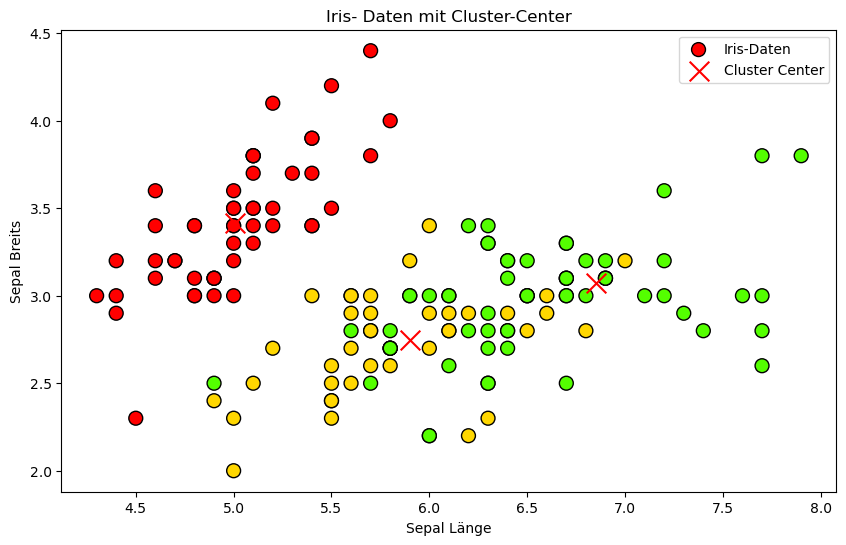

In [48]:
plot_cluster(X,ms)

## k-Means mit sklearn

Wir halten nun den k-Means-Algorithmus aus `sklearn` daneben:

In [49]:
from sklearn.cluster import KMeans

Kmean = KMeans(n_clusters=3,verbose=0,max_iter=10,n_init = 'auto')
Kmean.fit(X)
cc = Kmean.cluster_centers_
print(cc)

[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.418      1.464      0.244     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


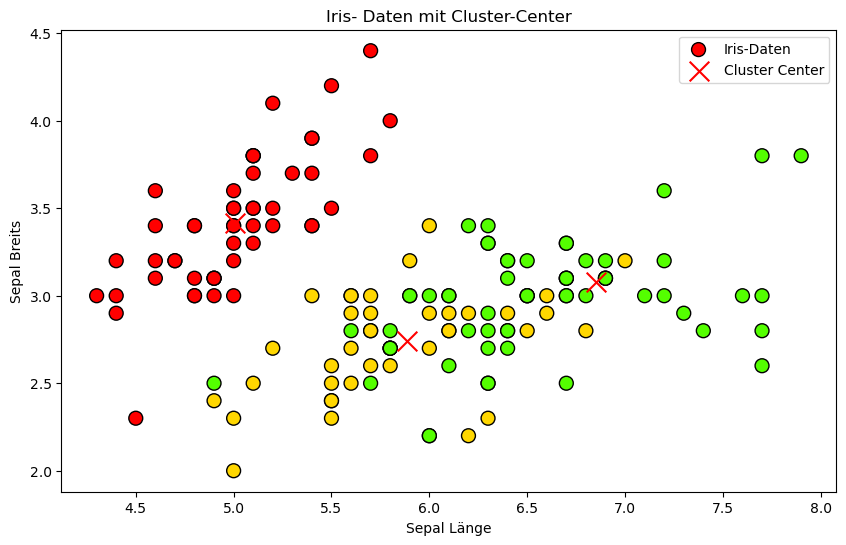

In [50]:
plot_cluster(X,cc)